# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

#### Импортируем необходимые библиотеки

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sb

In [5]:
data = pd.read_csv('/datasets/real_estate_data.csv', '\t')
pd.set_option('display.max_columns', 100) # установили колл-во столбцов для вывода 100, чтобы проанализировать всю таблицу.

In [6]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### *Вывод: Шаг 1*

1. Данные из обьявлений о продаже квартир пришли в размере 23699 уникальных строк = квартир, по которым есть информация в виде 22 столбцов.
1. **total_images**            Все ок, оставляем данные.
1. **last_price**             Все ок, оставляем данные.
1. **total_area**             Все ок, оставляем данные
1. **first_day_exposition**    Строки не пропущены, тип данных можно поменять с object на date
1. **rooms**                   Все ок, оставляем данные
1. **ceiling_height**          Пропущены строки, оставим пропуки Nan.
1. **floors_total**            Пропущено 86 строк, оставим Nan. Можно заменить тип данных на int 64
1. **living_area**             Пропущены строки, можно попробовать заменить пропуски разностью **total_area - kitchen_area**
1. **floor**                  Все ок, оставляем данные
1. **is_apartment**            Пропущены значение, скорее всего надо заменить *Nan на  False*
1. **studio**               Все ок, оставляем данные
1. **open_plan**               Все ок, оставляем данные
1. **kitchen_area**            Пропущены строки, заменим пропуски разностью **total_area - living_area**
1. **balcony**                 Заменим Nan на 0
1. **locality_name**           Пропущены строки, оставим пропуки Nan, хотя делать анализ цен без привязки к населенному пункту кажется нецелесообразным.
1. **airports_nearest**        Пропущены строки, оставим пропуки Nan.
1. **cityCenters_nearest**     Пропущены строки, оставим пропуки Nan.
1. **parks_around3000**        Пропущены значение, скорее всего надо заменить *Nan на  0*
1. **parks_nearest**           Пропущены строки, оставим пропуки Nan.
1. **ponds_around3000**       Пропущены значение, скорее всего надо заменить *Nan на  0*
1. **ponds_nearest**           Пропущены строки, оставим пропуки Nan.
1. **days_exposition**         Пропущены строки, оставим пропуки Nan.

### Шаг 2. Предобработка данных

In [8]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

In [9]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] - data['living_area']
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] - data['kitchen_area']

In [10]:
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0
data.loc[data['balcony'].isna(), 'balcony'] = 0

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [12]:
data.duplicated().sum()

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             22235 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            22235 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_ar

### *Вывод: Шаг 2*

1. Встретили много пропусков, которые могли возникнуть по причине, что люди продающие жилье не заполнили соответсвтвующие поля в графах обьявлений. Либо при автоматической выгрузке данных, не все данные могут быть распознаны и корректно выгружены.
1. Заменили Nan в **is_apartment, parks_around3000, ponds_around3000 и balcony** на False и 0 соответсвенно.
1. Сделали предположение что **kitchen_area + living_area = total area.**, отсюда заполнили неопределенные строки для living_area и kitchen_area. В итоге получили около + 1000 строк данных.
1. Изменилили тип данных в **first_day_exposition** с object на datetime.
1. На всякий случай проверили на дубликаты, их нет. Вывели инфу о **data**, как видно пропусков стало гораздо меньше!

### Шаг 3. Посчитайте и добавьте в таблицу

In [14]:
data['cost_of_1m2'] = data['last_price'] / data['total_area']

In [15]:
data['weekday']=data['first_day_exposition'].dt.weekday 
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year

In [16]:
def floor_relation(row):
    floors_total = row['floors_total']
    floor = row['floor']  
    
    if floor == floors_total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

In [17]:
data['floor_relation'] = data.apply(floor_relation, axis=1)

In [18]:
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']
data['living_to_total'] = data['living_area'] / data['total_area']

### *Вывод: Шаг 3*

1. Рассчитали цену одного кв.м и добавили ее в соответсвующей столбец **cost_of_1m2**
1. Вывели в отдельные столбцы **weekday**, **month** и **year** информацию о неделе, месяце и годе, когда была сделана публикация
1. Применили функцию, которая возвращает отношение этажа к общей этажности дома(первый, последний, другой)
1. Посчитаны отношения площадей кухни и жилой площади к общей площади соответсвенно.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [19]:
row_data = data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()
row_data

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


min_area = 12.0 | max_area = 900.0
min_price = 12190.0 | max_price = 763000000.0
min_rooms = 0 | max_rooms = 19
min_height = 1.0 | max_height = 100.0


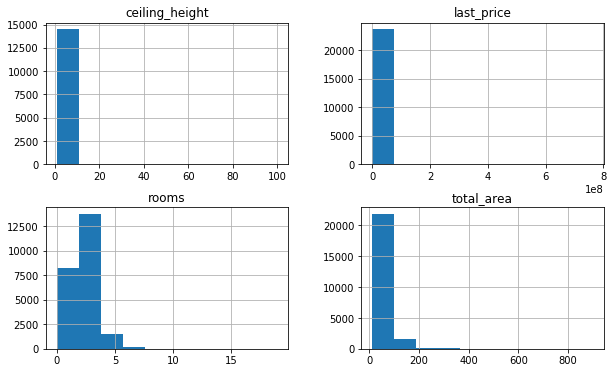

In [20]:
data.hist(['total_area', 'last_price', 'rooms', 'ceiling_height'] ,  figsize = (10,6))
a = data['total_area'].min()
b = data['total_area'].max()
c = data['last_price'].min()
d = data['last_price'].max()
e = data['rooms'].min()
f = data['rooms'].max()
g = data['ceiling_height'].min()
h = data['ceiling_height'].max()
print('min_area =', a,'|','max_area =',b)
print('min_price =', c,'|','max_price =',d)
print('min_rooms =', e,'|','max_rooms =',f)
print('min_height =', g,'|','max_height =',h)

In [21]:
row_data_time=data[['days_exposition']].describe()
row_data_time

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd6e6a8ba8>]],
      dtype=object)

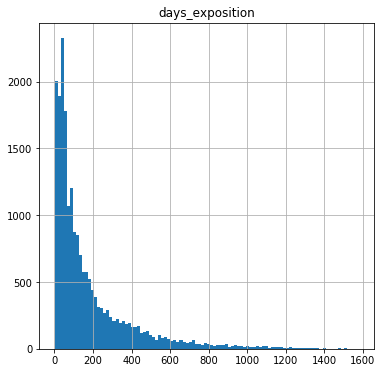

In [22]:
data.hist(['days_exposition'], bins =100, figsize = (6,6))

#### Подвывод: Шаг 4.1
1. Вывели данные распределения по сырой таблице **data** через *describe()* и построили гистограммы через *hist()*. Да, с такими данными хороший анализ не сделаешь. Минимальная площадь 12, а максимальная 900 м2. А стоимость меняется от 12 т. руб до 763 млн, не говоря о высоте потолков и количестве комнат.
1. Вывели статистические данные по **days_exposition**. Что тут скажешь, если судить по среднему, то квартиры продаются за 180 дней, но медиана говорит о другом, что квартиры продаются за 95 дней. Минимальный срок продажи 1 день, в это верится с трудом, максимальный 1580 дней (наверное забыли снять обьявление)

**Вывода один, надо  чистить данные от вылетов.**

In [23]:
perc =[.10, .90]
row_data = data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe(percentiles = perc)
row_data

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
10%,33.000000,2.500000e+06,1.000000,2.500000
50%,52.000000,4.650000e+06,2.000000,2.650000
90%,93.520000,1.091423e+07,3.000000,3.060000
max,900.000000,7.630000e+08,19.000000,100.000000


min_area = 33.02 | max_area = 93.5
min_price = 2527570.0 | max_price = 10900000.0
min_rooms = 1 | max_rooms = 3
min_height = 2.51 | max_height = 3.05


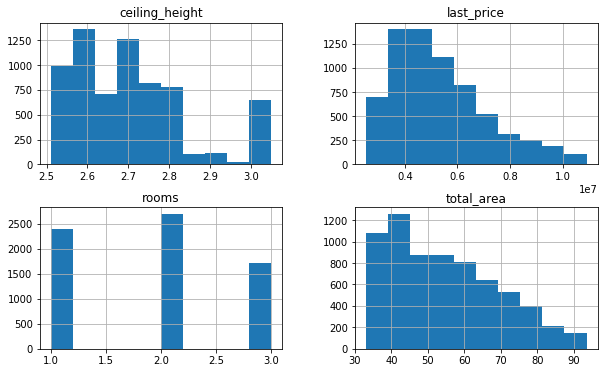

In [24]:
data_sorted = data.query('2.5 <ceiling_height<3.06  &  2500000<last_price<1.091423e+07  &  33<total_area<93.52  & 0<rooms<=3').reset_index(drop=True)
data_sorted.hist(['total_area', 'last_price', 'rooms', 'ceiling_height'] ,  figsize = (10,6))
a = data_sorted['total_area'].min()
b = data_sorted['total_area'].max()
c = data_sorted['last_price'].min()
d = data_sorted['last_price'].max()
e = data_sorted['rooms'].min()
f = data_sorted['rooms'].max()
g = data_sorted['ceiling_height'].min()
h = data_sorted['ceiling_height'].max()
print('min_area =', a,'|','max_area =',b)
print('min_price =', c,'|','max_price =',d)
print('min_rooms =', e,'|','max_rooms =',f)
print('min_height =', g,'|','max_height =',h)

In [25]:
row_data_time_sorted=data_sorted[['days_exposition']].describe(percentiles = perc)
row_data_time_sorted

,days_exposition
count,5865.000000
mean,178.334015
std,216.660941
min,2.000000
10%,16.000000
50%,95.000000
90%,456.000000
max,1553.000000


In [26]:
data_sorted = data_sorted.query('31 <=days_exposition< 456').reset_index(drop=True)

min_area = 31.0 | max_area = 453.0


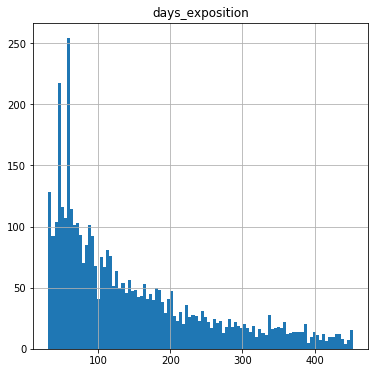

In [27]:
data_sorted.hist(['days_exposition'], bins =100, figsize = (6,6))
i = data_sorted['days_exposition'].min()
j = data_sorted['days_exposition'].max()
print('min_area =', i,'|','max_area =', j)

In [28]:
data_now_better = data_sorted[['days_exposition','total_area', 'last_price', 'rooms', 'ceiling_height']].describe(percentiles = perc)
data_now_better

,days_exposition,total_area,last_price,rooms,ceiling_height
count,4135.000000,4135.000000,4.135000e+03,4135.000000,4135.000000
mean,147.435308,54.649064,5.273372e+06,1.888996,2.705262
std,104.988258,14.639685,1.777771e+06,0.760994,0.131798
min,31.000000,33.020000,2.530000e+06,1.000000,2.510000
10%,45.000000,37.000000,3.300000e+06,1.000000,2.550000
50%,113.000000,52.800000,4.900000e+06,2.000000,2.700000
90%,317.000000,76.000000,7.900000e+06,3.000000,2.950000
max,453.000000,93.500000,1.090000e+07,3.000000,3.050000


#### Подвывод: Шаг 4.2
1. Вывели данные распределения по сырой таблице data через describe(), но на этот раз вместо персентилей 25 и 75%, поставили 10% и 90%. Оценка вероятности встретить собитие равное P90 и P10 позволяет более коректно оценить выборку(мое субьективное мнение, подкрепленное практикой). Видно, что в минимальном кейсе площадь меняется от 33 до 93 м, поэтому в новоу отфильтрованную таблицу **data_sorted** возмем, только данные входящие в этот диапазон. Аналогично поступим для цены, числа комнат и высоты потолков).
1. Провери **data_sorted** на статистику по времени продаже, видно, что медиана и среднее все еще отличаются, практически в 2 раза. Поэтому еще раз отфильтруем таблицу **data_sorted** на предмет вылетов по условию **'31 <=days_exposition< 456'**. 
1. Оценим статистику по финально отфильтрованной таблице **data_sorted**, видно, что параметр mean и P50, теперь сходятся намного лучше. Также нет сильно больших или маленьких значений по фильтрованным столбцам.


In [29]:
data_price = data_sorted[['last_price','total_area','rooms','floor','cityCenters_nearest','floor_relation']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd6db23198>,
      dtype=object)

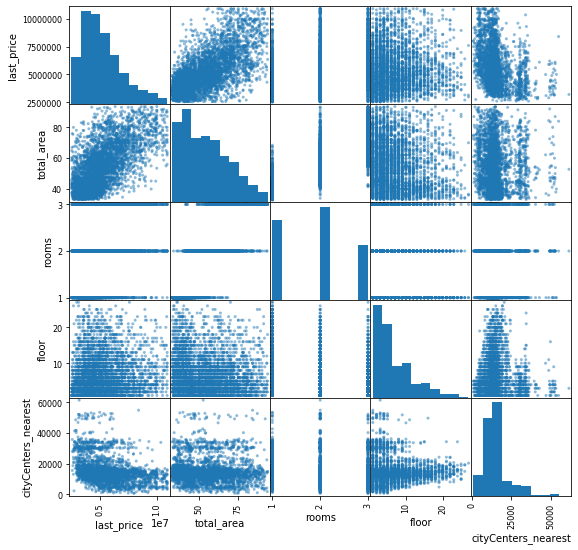

In [30]:
pd.plotting.scatter_matrix(data_price, figsize=(9, 9))

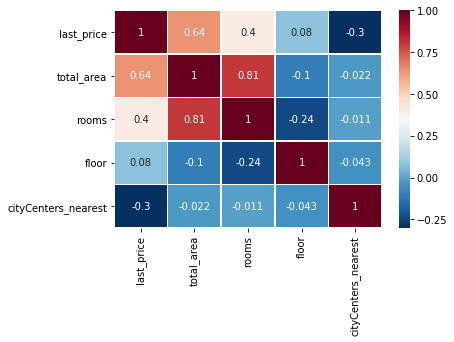

In [31]:
pearsoncorr = data_price.corr(method='pearson')

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [32]:
data_price_date = data_sorted[['last_price','weekday','month','year']]

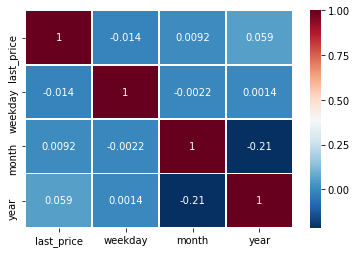

In [33]:
pearsoncorr_1 = data_price_date.corr(method='pearson')

sb.heatmap(pearsoncorr_1, 
            xticklabels=pearsoncorr_1.columns,
            yticklabels=pearsoncorr_1.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#### Подвывод: Шаг 4.3
1. Изучим какие факторы больше всего влияют на стоимость квартиры. Выделим новый датафрем по столбцам **'last_price','total_area','rooms','floor','cityCenters_nearest','floor_relation'**
1. Построим scatter плот, и увидим, что единсвенная визуальная зависимость наблюдается м/у стоимостью жилья и квадратурой, что и не удивительно.
1. Чтобы лучше оценить эту самую зависимость, найдем коэффициент Пирсона **.corr(method='pearson')** и выведем scatter plot, но уже в колличественных единицах. Зависимость  м/у стоимостью жилья и квадратурой - 0.64, (не идеально, тк не дотягивает до общепринятых 0.7, но и не плохо, так как явно наблюдается тренд)
1. Также изучим зависимость от даты размещения: дня недели, месяца и года. Найдем коэффициент Пирсона и выведем его. Получаем, что квартиры подаются на продажу всегда: и днем и ночью и в новый год и жарким летом.

In [34]:
count_bysity = data_sorted.groupby('locality_name').count().sort_values('total_images', ascending = False)
count_bysity.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_1m2,weekday,month,year,floor_relation,kitchen_to_total,living_to_total
locality_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,2940,2940,2940,2940,2940,2940,2939,2828,2940,2940,2940,2940,2828,2940,2931,2937,2940,1203,2940,1392,2940,2940,2940,2940,2940,2940,2828,2828
Всеволожск,123,123,123,123,123,123,123,114,123,123,123,123,114,123,0,0,123,0,123,0,123,123,123,123,123,123,114,114
посёлок Мурино,105,105,105,105,105,105,105,105,105,105,105,105,105,105,0,0,105,0,105,0,105,105,105,105,105,105,105,105
посёлок Шушары,97,97,97,97,97,97,97,93,97,97,97,97,93,97,96,96,97,0,97,20,97,97,97,97,97,97,93,93
посёлок Парголово,76,76,76,76,76,76,76,75,76,76,76,76,75,76,76,76,76,2,76,13,76,76,76,76,76,76,75,75
деревня Кудрово,68,68,68,68,68,68,68,66,68,68,68,68,66,68,0,0,68,0,68,0,68,68,68,68,68,68,66,66
Пушкин,63,63,63,63,63,63,63,60,63,63,63,63,60,63,63,63,63,33,63,38,63,63,63,63,63,63,60,60
Сестрорецк,51,51,51,51,51,51,51,50,51,51,51,51,50,51,51,51,51,14,51,41,51,51,51,51,51,51,50,50
Колпино,50,50,50,50,50,50,50,49,50,50,50,50,49,50,50,50,50,16,50,32,50,50,50,50,50,50,49,49


In [35]:
count_bysity = count_bysity.query("total_images >= 46")

In [36]:
citylist=list(count_bysity.index.values)
print(citylist)

['Санкт-Петербург', 'Всеволожск', 'посёлок Мурино', 'посёлок Шушары', 'посёлок Парголово', 'деревня Кудрово', 'Пушкин', 'Сестрорецк', 'Колпино', 'Петергоф']


In [37]:
data_by_topsity= data_sorted.query('locality_name in @citylist').reset_index(drop = True)

In [38]:
data_by_topsity.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_1m2,weekday,month,year,floor_relation,kitchen_to_total,living_to_total
0,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,0.214646,0.512626
1,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,False,False,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943.925234,5,7,2017,последний,0.121495,0.630841
2,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,False,False,9.0,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.317073,3,11,2017,первый,0.109756,0.678049
3,12,6120000.0,80.0,2017-09-28,3,2.70,27.0,48.0,11,False,False,False,12.0,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0,76500.000000,3,9,2017,другой,0.150000,0.600000
4,20,5000000.0,58.0,2017-04-24,2,2.75,25.0,30.0,15,False,False,False,11.0,2.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,60.0,86206.896552,0,4,2017,другой,0.189655,0.517241


In [39]:
city_cost= data_by_topsity.pivot_table(index = 'locality_name', values ='cost_of_1m2', aggfunc = 'mean' ).sort_values('cost_of_1m2',ascending = False)
city_cost.head(10)

,cost_of_1m2
locality_name,
Санкт-Петербург,105975.100163
Сестрорецк,101755.887994
Пушкин,101022.112147
деревня Кудрово,90676.361662
посёлок Парголово,89463.127479
посёлок Мурино,85932.684036
Петергоф,81440.408473
посёлок Шушары,76281.111294
Колпино,74128.022157


In [40]:
data_by_topsity= data_by_topsity.merge(city_cost, on ='locality_name')
data_by_topsity.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_1m2_x,weekday,month,year,floor_relation,kitchen_to_total,living_to_total,cost_of_1m2_y
0,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,0.214646,0.512626,105975.100163
1,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,False,False,9.0,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.317073,3,11,2017,первый,0.109756,0.678049,105975.100163
2,3,6800000.0,76.0,2015-10-01,2,2.75,23.0,39.0,18,False,False,False,15.0,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0,89473.684211,3,10,2015,другой,0.197368,0.513158,105975.100163
3,20,7100000.0,70.0,2017-05-12,3,2.60,17.0,49.0,11,False,False,False,9.2,0.0,Санкт-Петербург,29197.0,11456.0,2.0,452.0,1.0,779.0,151.0,101428.571429,4,5,2017,другой,0.131429,0.700000,105975.100163
4,8,7200000.0,67.9,2017-10-26,2,2.80,16.0,38.1,4,False,False,False,13.4,2.0,Санкт-Петербург,32888.0,12944.0,0.0,NaN,0.0,NaN,112.0,106038.291605,3,10,2017,другой,0.197349,0.561119,105975.100163


#### Подвывод: Шаг 4.4

1. Отсортируем data_sorted по колличеству обьявлений поданных из определенных населенных пунктов, и выведем таблицу. Выведем листом первые 10 мест по колличеству обьявлений. Получаем следующие города **['Санкт-Петербург', 'Всеволожск', 'посёлок Мурино', 'посёлок Шушары', 'посёлок Парголово', 'деревня Кудрово', 'Пушкин', 'Сестрорецк', 'Колпино', 'Петергоф']**. Все как и предполагалось, Санкт-Петербург на первом месте, затем все его близрасположенные агломерации.
1. Создадим **data_by_topsity** по условию вхождения полученного списка городов из таблицы **data_sorted**
1. Найдем среднюю цену на 1 кв. м в зависимости от города. Сделаем это через **.pivot_table**. Получаем следующее: Питер - самый дорогой, недалеко ушел Сестрорецк, замыкает десятку Всеволожск.
1. Сделаем merge по data_by_topsity с city_cost, так мы добавим среднюю стоимость жилья на город в основную таблицу. Посмотрим результат, выведем первые 5 строк.

<font color='blue'> Хорошо. </font>

In [41]:
data_by_SPb = data_by_topsity.query('"Санкт-Петербург" in locality_name  ')

In [42]:
data_by_SPb['distance_to_center'] = (data_by_SPb['cityCenters_nearest']/ 1000).round(decimals=0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
data_by_SPb.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_1m2_x,weekday,month,year,floor_relation,kitchen_to_total,living_to_total,cost_of_1m2_y,distance_to_center
0,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,0.214646,0.512626,105975.100163,14.0
1,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,False,False,9.0,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.317073,3,11,2017,первый,0.109756,0.678049,105975.100163,11.0
2,3,6800000.0,76.0,2015-10-01,2,2.75,23.0,39.0,18,False,False,False,15.0,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0,89473.684211,3,10,2015,другой,0.197368,0.513158,105975.100163,15.0
3,20,7100000.0,70.0,2017-05-12,3,2.60,17.0,49.0,11,False,False,False,9.2,0.0,Санкт-Петербург,29197.0,11456.0,2.0,452.0,1.0,779.0,151.0,101428.571429,4,5,2017,другой,0.131429,0.700000,105975.100163,11.0
4,8,7200000.0,67.9,2017-10-26,2,2.80,16.0,38.1,4,False,False,False,13.4,2.0,Санкт-Петербург,32888.0,12944.0,0.0,NaN,0.0,NaN,112.0,106038.291605,3,10,2017,другой,0.197349,0.561119,105975.100163,13.0


In [44]:
data_by_SPb_km= data_by_SPb.groupby('distance_to_center')['last_price'].mean()

In [45]:
data_by_SPb_km=data_by_SPb_km.round(decimals=0)
data_by_SPb= data_by_SPb.merge(data_by_SPb_km, on ='distance_to_center')

In [46]:
data_by_SPb.head(5)

,total_images,last_price_x,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_1m2_x,weekday,month,year,floor_relation,kitchen_to_total,living_to_total,cost_of_1m2_y,distance_to_center,last_price_y
0,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.252525,3,11,2017,другой,0.214646,0.512626,105975.100163,14.0,5374862.0
1,14,5150000.0,47.0,2018-08-06,2,2.75,9.0,28.1,9,False,False,False,7.0,2.0,Санкт-Петербург,10142.0,13743.0,2.0,751.0,1.0,881.0,34.0,109574.468085,0,8,2018,последний,0.148936,0.597872,105975.100163,14.0,5374862.0
2,6,4700000.0,67.0,2017-04-29,3,2.70,9.0,43.4,1,False,False,False,8.8,2.0,Санкт-Петербург,15361.0,14157.0,0.0,NaN,0.0,NaN,339.0,70149.253731,5,4,2017,первый,0.131343,0.647761,105975.100163,14.0,5374862.0
3,6,4700000.0,42.0,2018-11-05,2,2.70,5.0,27.0,2,False,False,False,6.0,1.0,Санкт-Петербург,11944.0,13619.0,0.0,NaN,0.0,NaN,116.0,111904.761905,0,11,2018,другой,0.142857,0.642857,105975.100163,14.0,5374862.0
4,16,4200000.0,60.1,2017-09-11,3,2.65,9.0,43.0,1,False,False,False,7.0,2.0,Санкт-Петербург,28530.0,14249.0,0.0,NaN,1.0,623.0,214.0,69883.527454,0,9,2017,первый,0.116473,0.715474,105975.100163,14.0,5374862.0


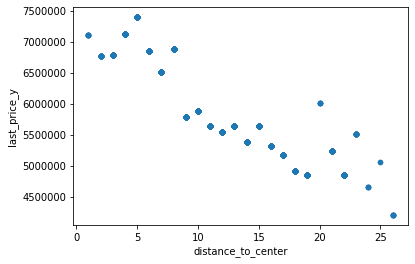

In [47]:
data_by_SPb.plot(x='distance_to_center', y='last_price_y', kind='scatter')

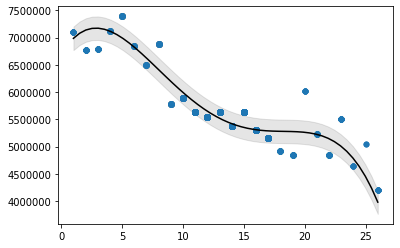

In [48]:
x = data_by_SPb['distance_to_center']
y = data_by_SPb['last_price_y']
plt.plot(x, y, 'o', mec='none')

params = np.polyfit(x, y, 4)
xp = np.linspace(x.min(), x.max())
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k')

sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.1)


In [49]:
data_by_SPb = data_by_SPb.query(' distance_to_center < 5  ')

In [50]:
data_by_SPb.head(5)

,total_images,last_price_x,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_1m2_x,weekday,month,year,floor_relation,kitchen_to_total,living_to_total,cost_of_1m2_y,distance_to_center,last_price_y
2486,15,6800000.0,57.8,2017-04-28,3,2.80,5.0,33.7,4,False,False,False,9.7,0.0,Санкт-Петербург,21545.0,1166.0,1.0,803.0,2.0,22.0,402.0,117647.058824,4,4,2017,другой,0.167820,0.583045,105975.100163,1.0,7105556.0
2487,20,7800000.0,81.4,2018-06-03,2,2.70,5.0,41.1,5,False,False,False,12.6,0.0,Санкт-Петербург,22393.0,1381.0,0.0,NaN,3.0,315.0,151.0,95823.095823,6,6,2018,последний,0.154791,0.504914,105975.100163,1.0,7105556.0
2488,7,5150000.0,44.3,2018-08-10,1,2.80,4.0,23.4,2,False,False,False,18.0,0.0,Санкт-Петербург,22433.0,1257.0,0.0,NaN,2.0,121.0,182.0,116252.821670,4,8,2018,другой,0.406321,0.528217,105975.100163,1.0,7105556.0
2489,7,8000000.0,74.3,2017-09-20,3,3.04,5.0,46.4,5,False,False,False,9.2,0.0,Санкт-Петербург,21290.0,869.0,2.0,234.0,3.0,305.0,293.0,107671.601615,2,9,2017,последний,0.123822,0.624495,105975.100163,1.0,7105556.0
2490,13,6200000.0,61.0,2017-12-06,2,2.80,3.0,36.0,2,False,False,False,25.0,0.0,Санкт-Петербург,20953.0,959.0,3.0,98.0,3.0,194.0,83.0,101639.344262,2,12,2017,другой,0.409836,0.590164,105975.100163,1.0,7105556.0


min_area = 34.2 | max_area = 93.3
min_price = 2750000.0 | max_price = 10900000.0
min_rooms = 1 | max_rooms = 3
min_height = 2.55 | max_height = 3.05


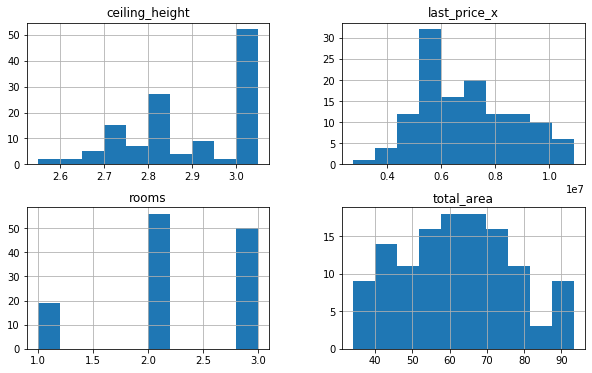

In [51]:
data_by_SPb.hist(['total_area', 'last_price_x', 'rooms', 'ceiling_height'] ,  figsize = (10,6))
a = data_by_SPb['total_area'].min()
b = data_by_SPb['total_area'].max()
c = data_by_SPb['last_price_x'].min()
d = data_by_SPb['last_price_x'].max()
e = data_by_SPb['rooms'].min()
f = data_by_SPb['rooms'].max()
g = data_by_SPb['ceiling_height'].min()
h = data_by_SPb['ceiling_height'].max()
print('min_area =', a,'|','max_area =',b)
print('min_price =', c,'|','max_price =',d)
print('min_rooms =', e,'|','max_rooms =',f)
print('min_height =', g,'|','max_height =',h)

In [52]:
data_by_SPb_price = data_by_SPb[['last_price_x','total_area','rooms','floor','distance_to_center','floor_relation']]

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd6dbca8d0>


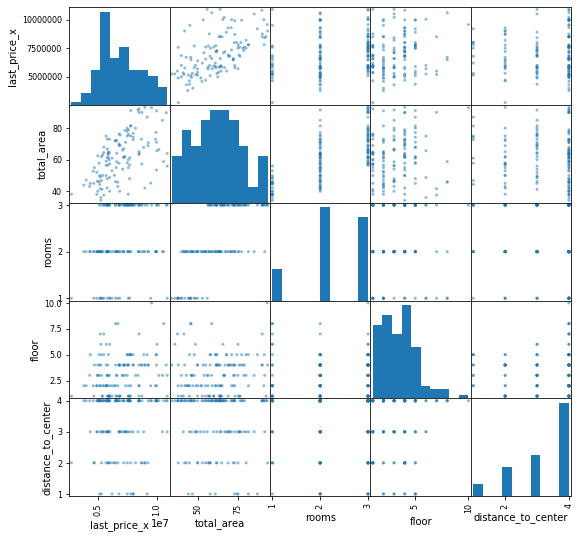

In [53]:
print(pd.plotting.scatter_matrix(data_by_SPb_price, figsize=(9, 9)))

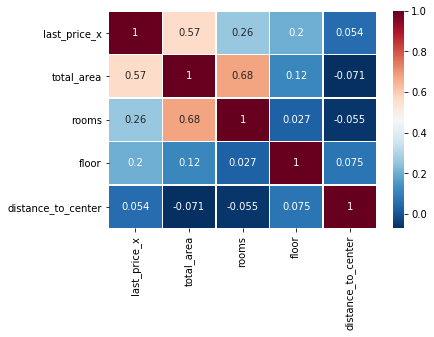

In [56]:
pearsoncorr_2 = data_by_SPb_price.corr(method='pearson')

sb.heatmap(pearsoncorr_2, 
            xticklabels=pearsoncorr_2.columns,
            yticklabels=pearsoncorr_2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#### Подвывод: Шаг 4.5
1. Выделим новую таблицу **data_by_SPb** по Санкт-Петербургу.
1. Создадим новый столбец **distance_to_center** путем деления на 1000 и округления до целых столбца **cityCenters_nearest**
1. Найдем среднюю цену на квартиру взавимости от удаленности от центра. Создадим новую таблицу **data_by_SPb_km** путем группирования и осредения **data_by_SPb** по  **cityCenters_nearest**
1. Соединим 2 таблицы методом merge. Теперь в основной таблице появился столбец last_price_y (средняя цена на кваритру взависимости от центра).
1. Построили график  data_by_SPb. где по оси Х взяли 'distance_to_center' а по оси  У='last_price_y', kind='scatter'. Видим, что есть тренд на увеличение цены по приближению к центру, осталось понять где этот самый центр начинается.
1. Будем считать, что центр, начинается там, где трендовая линия меняет свое направление (было бы лучше, взять производную от этой линии и посмотреть в какой точке она меняет знак, за эту точку бы и приняли начало цетра). Строим полином 4 степени, и о крах, не понятно, где начинается центр, кривая "гнется" в нескольких местах. Путем умозаключений принимаем, что самый центр, будет на последнем изломе, в районе 5 км от Дворцовой площади.
1. Создаем новую таблицу, включаем только те объявления, где расстояние до центра меньше 5 км. 
1. Анализируем, строим гистограммы распределения, они выглядят практически как нормальные, не зря мы чистили данные.
1. Анализируем кореллируя параметры и выводим коэффициент Пирсона. Получаем, что явная зависимость опять между ценой на квартиру и метражом. Вывод, в центре и везде зависимость формирования цены не меняется.


### Шаг 5. Общий вывод

Общий вывод по проделанной работе.
1. В данных встречаются пропуски, где то их можно заменить (например наличие парка если Nan, то False), а где можно оставить.
1. В данных встречаются выбросы, их надо анализировать и убирать, мы это сделали по параметру P10 P90
1. Если брать отсортированную выборку, то явная зависимость наблюдается только м/у площадью и ценой. Если брать узкую выборку например только на центр города, то зависимость остается приблизительно такой же. 
1. Квартиры продают всегда и везде в любое время года.
### Главные вывод: Большая квартира дороже маленькой. Центр дороже окраины.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод